In [45]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
NORTE_ESTADOS = ['AMAZONAS', 'AMAPA', 'RORAIMA', 'RONDONIA', 'TOCANTINS', 'ACRE', 'PARA']
NORDESTE_ESTADOS = ['MARANHAO', 'PIAUI', 'CEARA', 'RIO GRANDE DO NORTE', 'PARAIBA', 'PERNAMBUCO', 'ALAGOAS', 'SERGIPE', 'BAHIA']
CENTRO_OESTE_ESTADOS = ['MATO GROSSO', 'MATO GROSSO DO SUL', 'GOIAS', 'DISTRITO FEDERAL']
SUDESTE_ESTADOS = ['MINAS GERAIS', 'ESPIRITO SANTO', 'RIO DE JANEIRO', 'SAO PAULO']
SUL_ESTADOS = ['PARANA', 'SANTA CATARINA', 'RIO GRANDE DO SUL']

NORTE_ABREVIACOES = ['AM', 'AP', 'RR', 'RO', 'TO', 'AC', 'PA']
NORDESTE_ABREVIACOES = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
CENTRO_OESTE_ABREVIACOES = ['MT', 'MS', 'GO', 'DF']
SUDESTE_ABREVIACOES = ['MG', 'ES', 'RJ', 'SP']
SUL_ABREVIACOES = ['PR', 'SC', 'RS']

In [6]:
df_stations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/stations.csv')

df_2013 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2013/weather_2013.csv')
df_2013_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2013/weather_sum_2013.csv')

df_2014 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2014/weather_2014.csv')
df_2014_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2014/weather_sum_2014.csv')

df_2015 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2015/weather_2015.csv')
df_2015_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2015/weather_sum_2015.csv')

df_2016 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2016/weather_2016.csv')
df_2016_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2016/weather_sum_2016.csv')

df_2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2017/weather_2017.csv')
df_2017_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2017/weather_sum_2017.csv')

df_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2018/weather_2018.csv')
df_2018_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2018/weather_sum_2018.csv')

df_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2019/weather_2019.csv')
df_2019_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2019/weather_sum_2019.csv')

df_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2020/weather_2020.csv')
df_2020_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2020/weather_sum_2020.csv')

df_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2021/weather_2021.csv')
df_2021_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2021/weather_sum_2021.csv')

df_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2022/weather_2022.csv')
df_2022_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2022/weather_sum_2022.csv')

df_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_2023/weather_2023.csv')
df_2023_sum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset GS /Dataset/weather_sum_2023/weather_sum_2023.csv')

In [7]:
dfs_list = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]
dfs_sum_list = [df_2013_sum, df_2014_sum, df_2015_sum, df_2016_sum, df_2017_sum, df_2018_sum, df_2019_sum, df_2020_sum, df_2021_sum, df_2022_sum, df_2023_sum]

In [8]:
%%time
all_df_sum = pd.concat(dfs_sum_list)

CPU times: user 51 ms, sys: 0 ns, total: 51 ms
Wall time: 54.7 ms


In [9]:
# Estacoes por regioes
se_stations = df_stations[df_stations['region'] == 'SE']['id_station'].tolist()
s_stations = df_stations[df_stations['region'] == 'S']['id_station'].tolist()
co_stations = df_stations[df_stations['region'] == 'CO']['id_station'].tolist()
n_stations = df_stations[df_stations['region'] == 'N']['id_station'].tolist()
ne_stations = df_stations[df_stations['region'] == 'NE']['id_station'].tolist()

In [10]:
# Df's das somas separados por regiões
se_df_sum = all_df_sum[all_df_sum['ESTACAO'].isin(se_stations)]
s_df_sum = all_df_sum[all_df_sum['ESTACAO'].isin(s_stations)]
co_df_sum = all_df_sum[all_df_sum['ESTACAO'].isin(co_stations)]
n_df_sum = all_df_sum[all_df_sum['ESTACAO'].isin(n_stations)]
ne_df_sum = all_df_sum[all_df_sum['ESTACAO'].isin(ne_stations)]

## Tendências de Temperatura:

Análise por região



#### Sudeste

In [11]:
se_df_sum.head()

,ESTACAO,DATA (YYYY-MM-DD),rain_max,rad_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
98005,A612,2013-01-01,0.0,3931.4,26.770833,33.5,22.0,94.0,42.0,10.6,2.275000
98006,A612,2013-01-02,0.0,3804.7,27.658333,34.4,22.0,93.0,40.0,11.8,2.683333
98007,A612,2013-01-03,0.0,3800.4,27.591667,33.7,22.2,93.0,42.0,10.8,2.129167
98008,A612,2013-01-04,0.0,3426.2,26.520833,33.3,20.7,93.0,37.0,8.2,1.791667
98009,A612,2013-01-05,0.0,3411.9,26.962500,33.9,22.0,94.0,35.0,9.3,1.854167


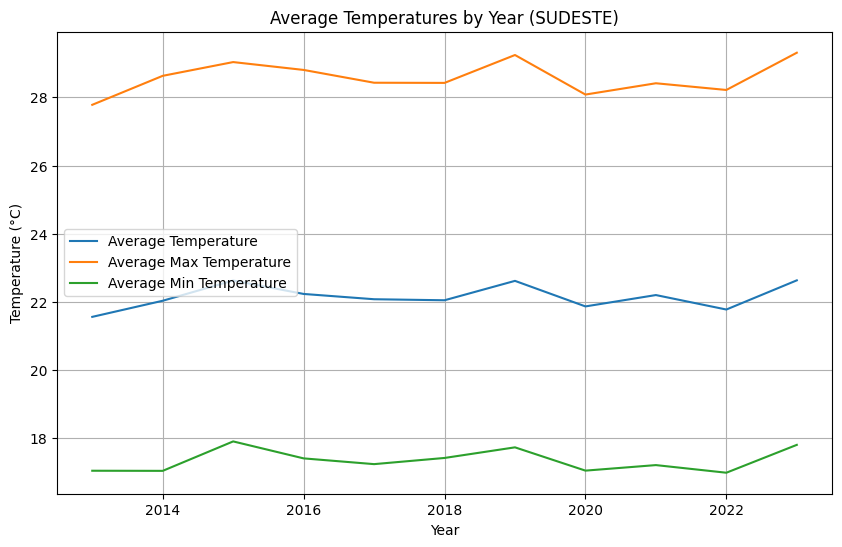

In [12]:
se_df_sum = se_df_sum.copy()
se_df_sum['DATA (YYYY-MM-DD)'] = pd.to_datetime(se_df_sum['DATA (YYYY-MM-DD)'])

# Extract the year from the date
se_df_sum['Year'] = se_df_sum['DATA (YYYY-MM-DD)'].dt.year

# Group by year and calculate the average temperature for each year
se_average_temperature_by_year = se_df_sum.groupby('Year')['temp_avg'].mean()
se_avarage_max_temperature_by_year = se_df_sum.groupby('Year')['temp_max'].mean()
se_avarage_min_temperature_by_year = se_df_sum.groupby('Year')['temp_min'].mean()

# Plot the average temperatures by year
plt.figure(figsize=(10, 6))
plt.plot(se_average_temperature_by_year.index, se_average_temperature_by_year, label='Average Temperature')
plt.plot(se_avarage_max_temperature_by_year.index, se_avarage_max_temperature_by_year, label='Average Max Temperature')
plt.plot(se_avarage_min_temperature_by_year.index, se_avarage_min_temperature_by_year, label='Average Min Temperature')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperatures by Year (SUDESTE)')
plt.legend()
plt.grid(True)
plt.show()

#### Sul

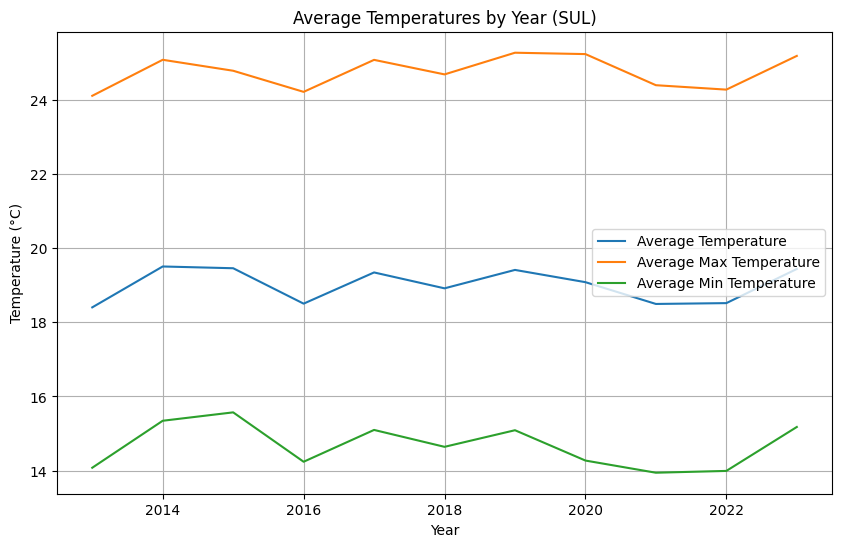

In [13]:
s_df_sum = s_df_sum.copy()
s_df_sum['DATA (YYYY-MM-DD)'] = pd.to_datetime(s_df_sum['DATA (YYYY-MM-DD)'])

# Extract the year from the date
s_df_sum['Year'] = s_df_sum['DATA (YYYY-MM-DD)'].dt.year

# Group by year and calculate the average temperature for each year
s_average_temperature_by_year = s_df_sum.groupby('Year')['temp_avg'].mean()
s_avarage_max_temperature_by_year = s_df_sum.groupby('Year')['temp_max'].mean()
s_avarage_min_temperature_by_year = s_df_sum.groupby('Year')['temp_min'].mean()

# Plot the average temperatures by year
plt.figure(figsize=(10, 6))
plt.plot(s_average_temperature_by_year.index, s_average_temperature_by_year, label='Average Temperature')
plt.plot(s_avarage_max_temperature_by_year.index, s_avarage_max_temperature_by_year, label='Average Max Temperature')
plt.plot(s_avarage_min_temperature_by_year.index, s_avarage_min_temperature_by_year, label='Average Min Temperature')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperatures by Year (SUL)')
plt.legend()
plt.grid(True)
plt.show()

#### Nordeste

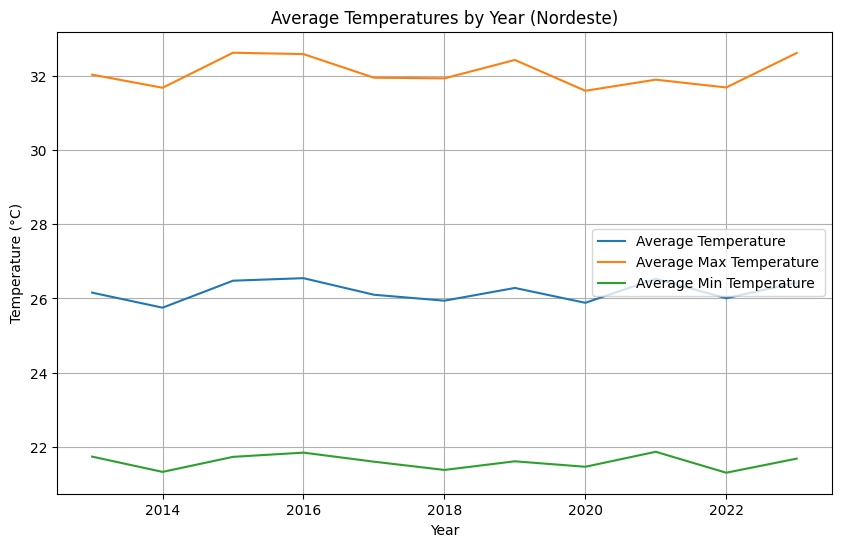

In [14]:
## Nordeste
ne_df_sum = ne_df_sum.copy()
ne_df_sum['DATA (YYYY-MM-DD)'] = pd.to_datetime(ne_df_sum['DATA (YYYY-MM-DD)'])

# Extract the year from the date
ne_df_sum['Year'] = ne_df_sum['DATA (YYYY-MM-DD)'].dt.year

# Group by year and calculate the average temperature for each year
ne_average_temperature_by_year = ne_df_sum.groupby('Year')['temp_avg'].mean()
ne_avarage_max_temperature_by_year = ne_df_sum.groupby('Year')['temp_max'].mean()
ne_avarage_min_temperature_by_year = ne_df_sum.groupby('Year')['temp_min'].mean()

# Plot the average temperatures by year
plt.figure(figsize=(10, 6))
plt.plot(ne_average_temperature_by_year.index, ne_average_temperature_by_year, label='Average Temperature')
plt.plot(ne_avarage_max_temperature_by_year.index, ne_avarage_max_temperature_by_year, label='Average Max Temperature')
plt.plot(ne_avarage_min_temperature_by_year.index, ne_avarage_min_temperature_by_year, label='Average Min Temperature')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperatures by Year (Nordeste)')
plt.legend()
plt.grid(True)
plt.show()

#### Norte

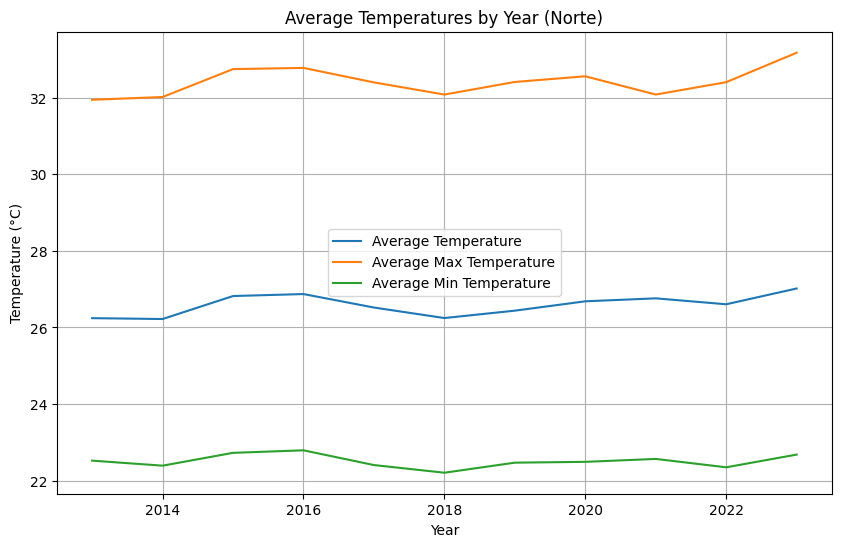

In [15]:
n_df_sum = n_df_sum.copy()
n_df_sum['DATA (YYYY-MM-DD)'] = pd.to_datetime(n_df_sum['DATA (YYYY-MM-DD)'])

# Extract the year from the date
n_df_sum['Year'] = n_df_sum['DATA (YYYY-MM-DD)'].dt.year

# Group by year and calculate the average temperature for each year
n_average_temperature_by_year = n_df_sum.groupby('Year')['temp_avg'].mean()
n_avarage_max_temperature_by_year = n_df_sum.groupby('Year')['temp_max'].mean()
n_avarage_min_temperature_by_year = n_df_sum.groupby('Year')['temp_min'].mean()

# Plot the average temperatures by year
plt.figure(figsize=(10, 6))
plt.plot(n_average_temperature_by_year.index, n_average_temperature_by_year, label='Average Temperature')
plt.plot(n_avarage_max_temperature_by_year.index, n_avarage_max_temperature_by_year, label='Average Max Temperature')
plt.plot(n_avarage_min_temperature_by_year.index, n_avarage_min_temperature_by_year, label='Average Min Temperature')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperatures by Year (Norte)')
plt.legend()
plt.grid(True)
plt.show()

#### Regiões com costa juntas

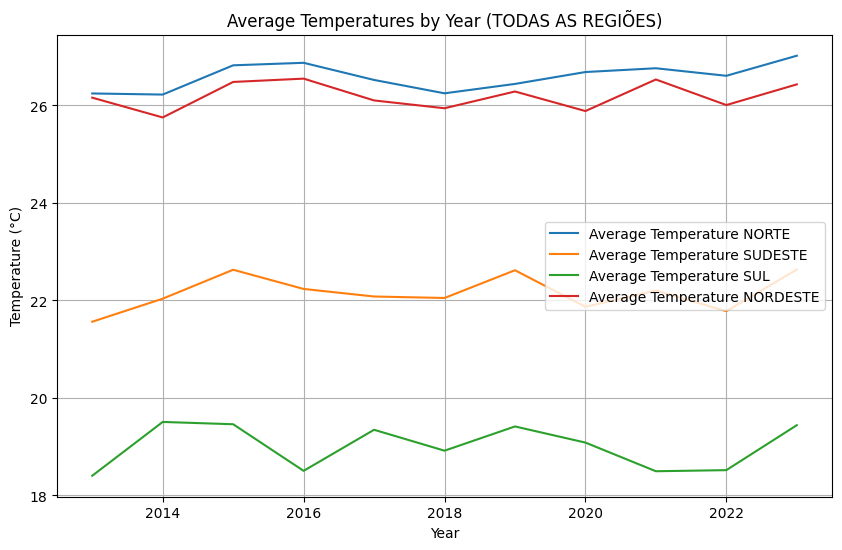

In [16]:
# Plot the average temperatures by year of all regions
plt.figure(figsize=(10, 6))
plt.plot(n_average_temperature_by_year.index, n_average_temperature_by_year, label='Average Temperature NORTE')
# plt.plot(n_avarage_max_temperature_by_year.index, n_avarage_max_temperature_by_year, label='Average Max Temperature NORTE')
# plt.plot(n_avarage_min_temperature_by_year.index, n_avarage_min_temperature_by_year, label='Average Min Temperature NORTE')

plt.plot(se_average_temperature_by_year.index, se_average_temperature_by_year, label='Average Temperature SUDESTE')
# plt.plot(se_avarage_max_temperature_by_year.index, se_avarage_max_temperature_by_year, label='Average Max Temperature SUDESTE')
# plt.plot(se_avarage_min_temperature_by_year.index, se_avarage_min_temperature_by_year, label='Average Min Temperature SUDESTE')

plt.plot(s_average_temperature_by_year.index, s_average_temperature_by_year, label='Average Temperature SUL')
# plt.plot(s_avarage_max_temperature_by_year.index, s_avarage_max_temperature_by_year, label='Average Max Temperature SUL')
# plt.plot(s_avarage_min_temperature_by_year.index, s_avarage_min_temperature_by_year, label='Average Min Temperature SUL')

plt.plot(ne_average_temperature_by_year.index, ne_average_temperature_by_year, label='Average Temperature NORDESTE')
# plt.plot(ne_avarage_max_temperature_by_year.index, ne_avarage_max_temperature_by_year, label='Average Max Temperature NORDESTE')
# plt.plot(ne_avarage_min_temperature_by_year.index, ne_avarage_min_temperature_by_year, label='Average Min Temperature NORDESTE')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperatures by Year (TODAS AS REGIÕES)')
plt.legend()
plt.grid(True)
plt.show()

## Padrões de Precipitação:

Análise por região

#### Sudeste



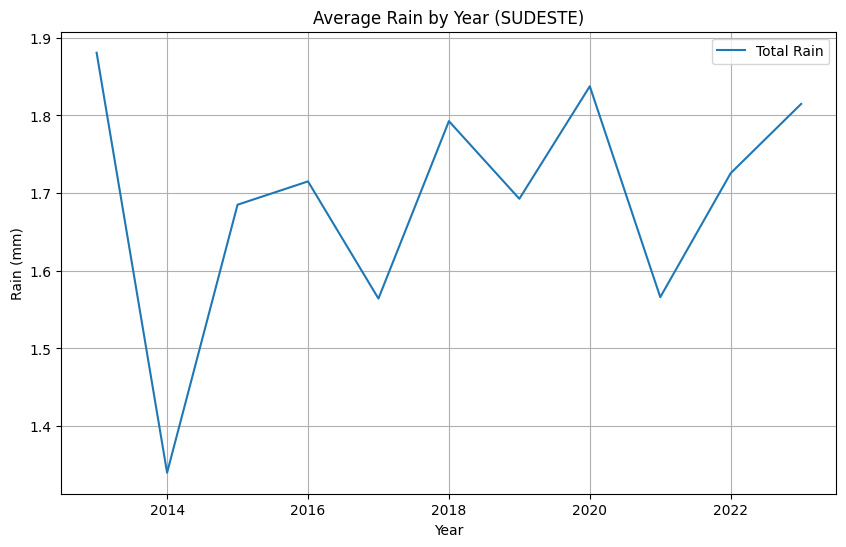

In [17]:
se_df_sum = se_df_sum.copy()
se_df_sum['DATA (YYYY-MM-DD)'] = pd.to_datetime(se_df_sum['DATA (YYYY-MM-DD)'])

# Extract the year from the date
se_df_sum['Year'] = se_df_sum['DATA (YYYY-MM-DD)'].dt.year

# Group by year and calculate the average rain for each year
se_average_rain_by_year = se_df_sum.groupby('Year')['rain_max'].mean()

# Plot the Total rain by year
plt.figure(figsize=(10, 6))
plt.plot(se_average_rain_by_year.index, se_average_rain_by_year, label='Total Rain')

plt.xlabel('Year')
plt.ylabel('Rain (mm)')
plt.title('Average Rain by Year (SUDESTE)')
plt.legend()
plt.grid(True)
plt.show()

#### Sul

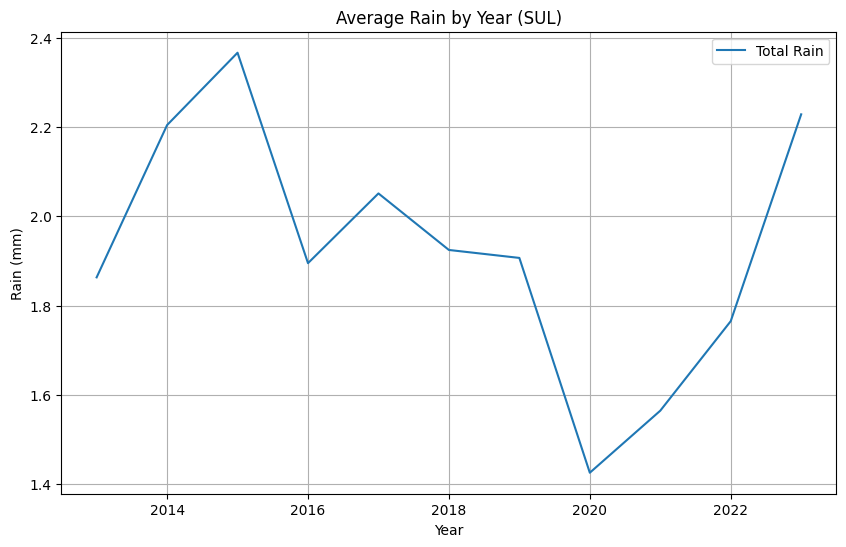

In [18]:
s_df_sum = s_df_sum.copy()
s_df_sum['DATA (YYYY-MM-DD)'] = pd.to_datetime(s_df_sum['DATA (YYYY-MM-DD)'])

# Extract the year from the date
s_df_sum['Year'] = s_df_sum['DATA (YYYY-MM-DD)'].dt.year

# Group by year and calculate the average rain for each year
s_average_rain_by_year = s_df_sum.groupby('Year')['rain_max'].mean()

# Plot the Total rain by year
plt.figure(figsize=(10, 6))
plt.plot(s_average_rain_by_year.index, s_average_rain_by_year, label='Total Rain')

plt.xlabel('Year')
plt.ylabel('Rain (mm)')
plt.title('Average Rain by Year (SUL)')
plt.legend()
plt.grid(True)
plt.show()

#### Norte

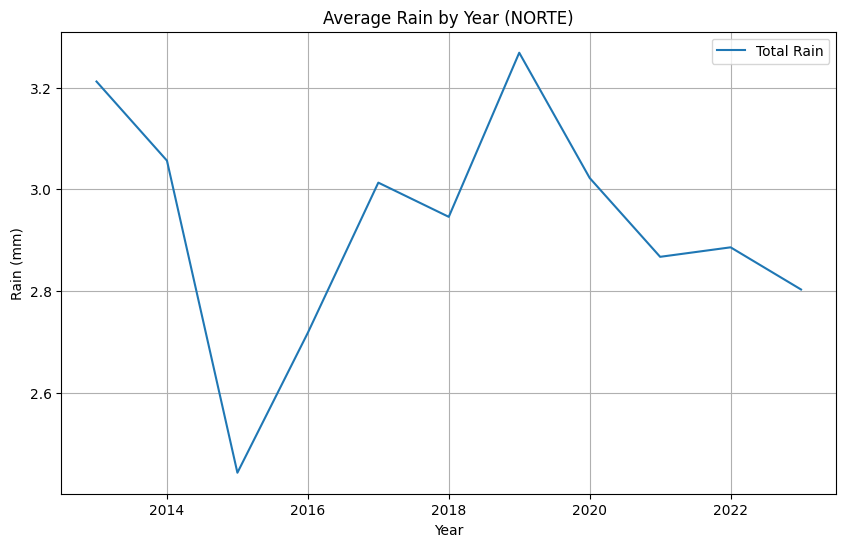

In [19]:
n_df_sum = n_df_sum.copy()
n_df_sum['DATA (YYYY-MM-DD)'] = pd.to_datetime(n_df_sum['DATA (YYYY-MM-DD)'])

# Extract the year from the date
n_df_sum['Year'] = n_df_sum['DATA (YYYY-MM-DD)'].dt.year

# Group by year and calculate the average rain for each year
n_average_rain_by_year = n_df_sum.groupby('Year')['rain_max'].mean()

# Plot the average rain by year
plt.figure(figsize=(10, 6))
plt.plot(n_average_rain_by_year.index, n_average_rain_by_year, label='Total Rain')

plt.xlabel('Year')
plt.ylabel('Rain (mm)')
plt.title('Average Rain by Year (NORTE)')
plt.legend()
plt.grid(True)
plt.show()

#### Nordeste

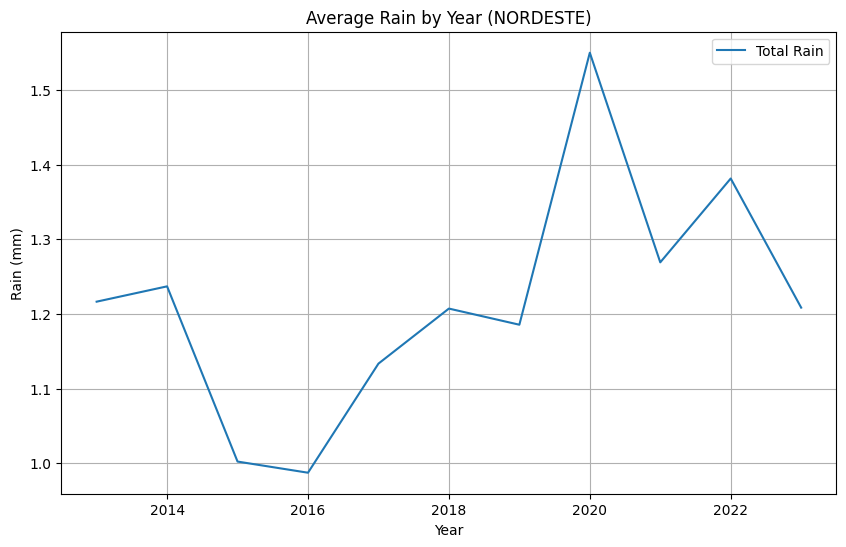

In [20]:
ne_df_sum = ne_df_sum.copy()
ne_df_sum['DATA (YYYY-MM-DD)'] = pd.to_datetime(ne_df_sum['DATA (YYYY-MM-DD)'])

# Extract the year from the date
ne_df_sum['Year'] = ne_df_sum['DATA (YYYY-MM-DD)'].dt.year

# Group by year and calculate the average rain for each year
ne_average_rain_by_year = ne_df_sum.groupby('Year')['rain_max'].mean()

# Plot the average rain by year
plt.figure(figsize=(10, 6))
plt.plot(ne_average_rain_by_year.index, ne_average_rain_by_year, label='Total Rain')

plt.xlabel('Year')
plt.ylabel('Rain (mm)')
plt.title('Average Rain by Year (NORDESTE)')
plt.legend()
plt.grid(True)
plt.show()

#### Regiões com costa juntas

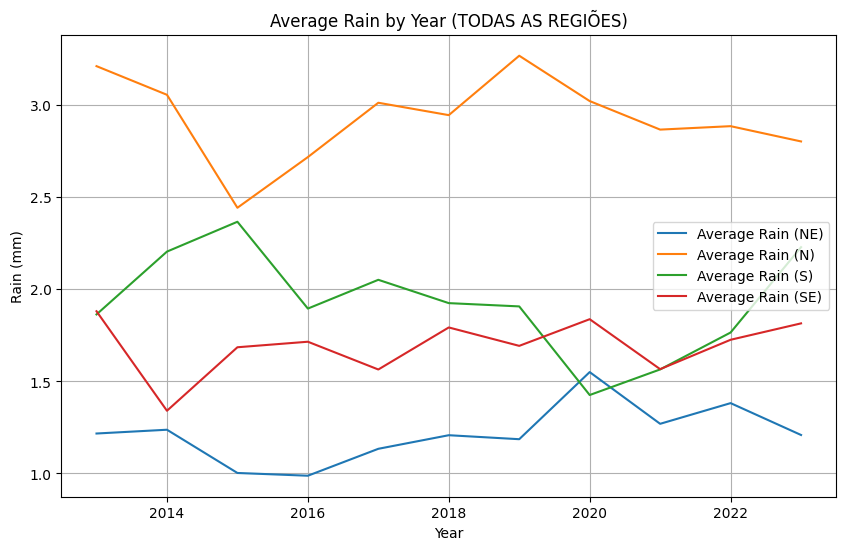

In [21]:
# Plot the Max rain by year
plt.figure(figsize=(10, 6))
plt.plot(ne_average_rain_by_year.index, ne_average_rain_by_year, label='Average Rain (NE)')
plt.plot(n_average_rain_by_year.index, n_average_rain_by_year, label='Average Rain (N)')
plt.plot(s_average_rain_by_year.index, s_average_rain_by_year, label='Average Rain (S)')
plt.plot(se_average_rain_by_year.index, se_average_rain_by_year, label='Average Rain (SE)')

plt.xlabel('Year')
plt.ylabel('Rain (mm)')
plt.title('Average Rain by Year (TODAS AS REGIÕES)')
plt.legend()
plt.grid(True)
plt.show()

## Eventos Climáticos Extremos:

Intensidade de chuva
Consoante a intensidade (ou taxa) da precipitação, esta é qualificada da seguinte forma:[10]

Chuva fraca: quando a intensidade é inferior a 2,5 milímetros por hora (mm/h);
Chuva moderada: quando a intensidade é igual ou superior a 2,5 mm/h mas inferior a 10 mm/h;
Chuva forte: quando a intensidade é igual ou superior a 10 mm/h mas inferior a 50 mm/h;
Chuva violenta: quando a intensidade é superior a 50 mm/h (geralmente sob a forma de aguaceiros).

fonte: https://brasilescola.uol.com.br/geografia/chuvas-precipitacoes.htm

In [22]:
# a partir dos valores acima definimos as constantes
WEAK_RAIN_IN_MM = (0.1, 2.5)
MODERATE_RAIN_IN_MM = (2.51, 10)
STRONG_RAIN_IN_MM = (10.01, 50)
VIOLENT_RAIN_IN_MM = (50.01, 9999) # 9999 Representa o `infinito`
HAS_RAINED = (0.1, 9999) # All possible values of rain

Pegando todos os valores de chuva

In [24]:
columns_of_value = ['ESTACAO', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'DATA (YYYY-MM-DD)']

rain_filtered_df_2013 = df_2013[columns_of_value].dropna()
rain_filtered_df_2013 = rain_filtered_df_2013[(rain_filtered_df_2013['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2013['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2014 = df_2014[columns_of_value].dropna()
rain_filtered_df_2014 = rain_filtered_df_2014[(rain_filtered_df_2014['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2014['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2015 = df_2015[columns_of_value].dropna()
rain_filtered_df_2015 = rain_filtered_df_2015[(rain_filtered_df_2015['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2015['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2016 = df_2016[columns_of_value].dropna()
rain_filtered_df_2016 = rain_filtered_df_2016[(rain_filtered_df_2016['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2016['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2017 = df_2017[columns_of_value].dropna()
rain_filtered_df_2017 = rain_filtered_df_2017[(rain_filtered_df_2017['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2017['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2018 = df_2018[columns_of_value].dropna()
rain_filtered_df_2018 = rain_filtered_df_2018[(rain_filtered_df_2018['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2018['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2019 = df_2019[columns_of_value].dropna()
rain_filtered_df_2019 = rain_filtered_df_2019[(rain_filtered_df_2019['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2019['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2020 = df_2020[columns_of_value].dropna()
rain_filtered_df_2020 = rain_filtered_df_2020[(rain_filtered_df_2020['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2020['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2021 = df_2021[columns_of_value].dropna()
rain_filtered_df_2021 = rain_filtered_df_2021[(rain_filtered_df_2021['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2021['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2022 = df_2022[columns_of_value].dropna()
rain_filtered_df_2022 = rain_filtered_df_2022[(rain_filtered_df_2022['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2022['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

rain_filtered_df_2023 = df_2023[columns_of_value].dropna()
rain_filtered_df_2023 = rain_filtered_df_2023[(rain_filtered_df_2023['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0.1) &
                          (rain_filtered_df_2023['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] <= 9999)]

Definindo um df com todos as horas de chuvas registradas entre 2000 e 2023

In [26]:
all_rain_df = pd.concat([rain_filtered_df_2013, rain_filtered_df_2014,
                        rain_filtered_df_2015, rain_filtered_df_2016, rain_filtered_df_2017,
                        rain_filtered_df_2018, rain_filtered_df_2019, rain_filtered_df_2020,
                        rain_filtered_df_2021, rain_filtered_df_2022, rain_filtered_df_2023])

In [27]:
all_rain_df

,ESTACAO,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",DATA (YYYY-MM-DD)
75,A001,0.2,2013-01-04
98,A001,0.2,2013-01-05
165,A001,0.4,2013-01-07
186,A001,25.2,2013-01-08
187,A001,24.6,2013-01-08
...,...,...,...
4966862,A898,0.2,2023-12-29
4966863,A898,1.4,2023-12-29
4966867,A898,1.0,2023-12-29
4966868,A898,0.2,2023-12-29


Verificando quantas chuvas de cada tipo tivemos em todos esses anos

In [29]:
weak_rain_count = all_rain_df[all_rain_df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].between(*WEAK_RAIN_IN_MM)].shape[0]
moderate_rain_count = all_rain_df[all_rain_df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].between(*MODERATE_RAIN_IN_MM)].shape[0]
strong_rain_count = all_rain_df[all_rain_df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].between(*STRONG_RAIN_IN_MM)].shape[0]
violent_rain_count = all_rain_df[all_rain_df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].between(*VIOLENT_RAIN_IN_MM)].shape[0]

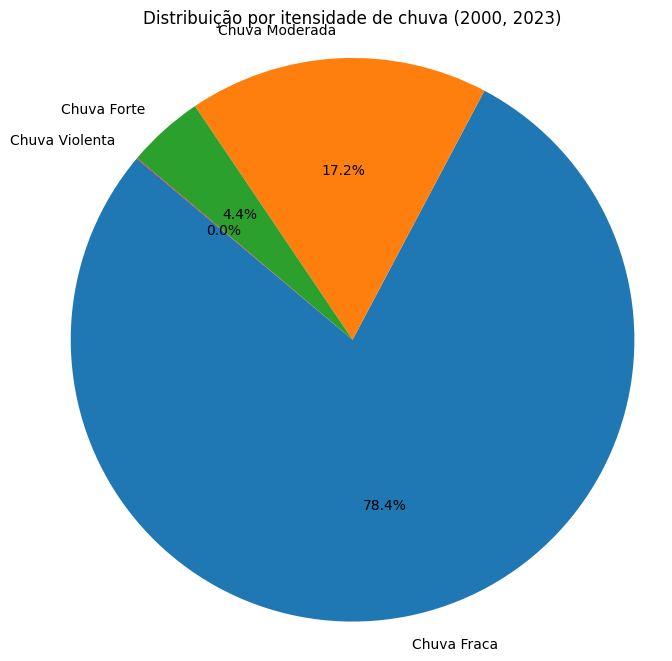

In [30]:
labels = ['Chuva Fraca', 'Chuva Moderada', 'Chuva Forte', 'Chuva Violenta']
counts = [weak_rain_count, moderate_rain_count, strong_rain_count, violent_rain_count]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por itensidade de chuva (2000, 2023)')
plt.axis('equal')

plt.show()

Fazendo a mesma análise por região

In [31]:
def get_rain_counts_in_df(df):
    WEAK_RAIN_IN_MM = (0.1, 2.5)
    MODERATE_RAIN_IN_MM = (2.51, 10)
    STRONG_RAIN_IN_MM = (10.01, 50)
    VIOLENT_RAIN_IN_MM = (50.01, 9999) # 9999 Representa o `infinito`

    weak_rain_count = df[df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].between(*WEAK_RAIN_IN_MM)].shape[0]
    moderate_rain_count = df[df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].between(*MODERATE_RAIN_IN_MM)].shape[0]
    strong_rain_count = df[df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].between(*STRONG_RAIN_IN_MM)].shape[0]
    violent_rain_count = df[df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].between(*VIOLENT_RAIN_IN_MM)].shape[0]

    return weak_rain_count, moderate_rain_count, strong_rain_count, violent_rain_count


# Df's das chuvas separados por regiões
se_df_rain = all_rain_df[all_rain_df['ESTACAO'].isin(se_stations)]
s_df_rain = all_rain_df[all_rain_df['ESTACAO'].isin(s_stations)]
co_df_rain = all_rain_df[all_rain_df['ESTACAO'].isin(co_stations)]
n_df_rain = all_rain_df[all_rain_df['ESTACAO'].isin(n_stations)]
ne_df_rain = all_rain_df[all_rain_df['ESTACAO'].isin(ne_stations)]


se_weak_rain_count, se_moderate_rain_count, se_strong_rain_count, se_violent_rain_count = get_rain_counts_in_df(se_df_rain)
s_weak_rain_count, s_moderate_rain_count, s_strong_rain_count, s_violent_rain_count = get_rain_counts_in_df(s_df_rain)
co_weak_rain_count, co_moderate_rain_count, co_strong_rain_count, co_violent_rain_count = get_rain_counts_in_df(co_df_rain)
n_weak_rain_count, n_moderate_rain_count, n_strong_rain_count, n_violent_rain_count = get_rain_counts_in_df(n_df_rain)
ne_weak_rain_count, ne_moderate_rain_count, ne_strong_rain_count, ne_violent_rain_count = get_rain_counts_in_df(ne_df_rain)

# Combine the counts for each region
weak_counts = [se_weak_rain_count, s_weak_rain_count, co_weak_rain_count, n_weak_rain_count, ne_weak_rain_count]
moderate_counts = [se_moderate_rain_count, s_moderate_rain_count, co_moderate_rain_count, n_moderate_rain_count, ne_moderate_rain_count]
strong_counts = [se_strong_rain_count, s_strong_rain_count, co_strong_rain_count, n_strong_rain_count, ne_strong_rain_count]
violent_counts = [se_violent_rain_count, s_violent_rain_count, co_violent_rain_count, n_violent_rain_count, ne_violent_rain_count]
# Calculate the total count for each region
total_counts = [se_weak_rain_count + se_moderate_rain_count + se_strong_rain_count + se_violent_rain_count,
                s_weak_rain_count + s_moderate_rain_count + s_strong_rain_count + s_violent_rain_count,
                co_weak_rain_count + co_moderate_rain_count + co_strong_rain_count + co_violent_rain_count,
                n_weak_rain_count + n_moderate_rain_count + n_strong_rain_count + n_violent_rain_count,
                ne_weak_rain_count + ne_moderate_rain_count + ne_strong_rain_count + ne_violent_rain_count]

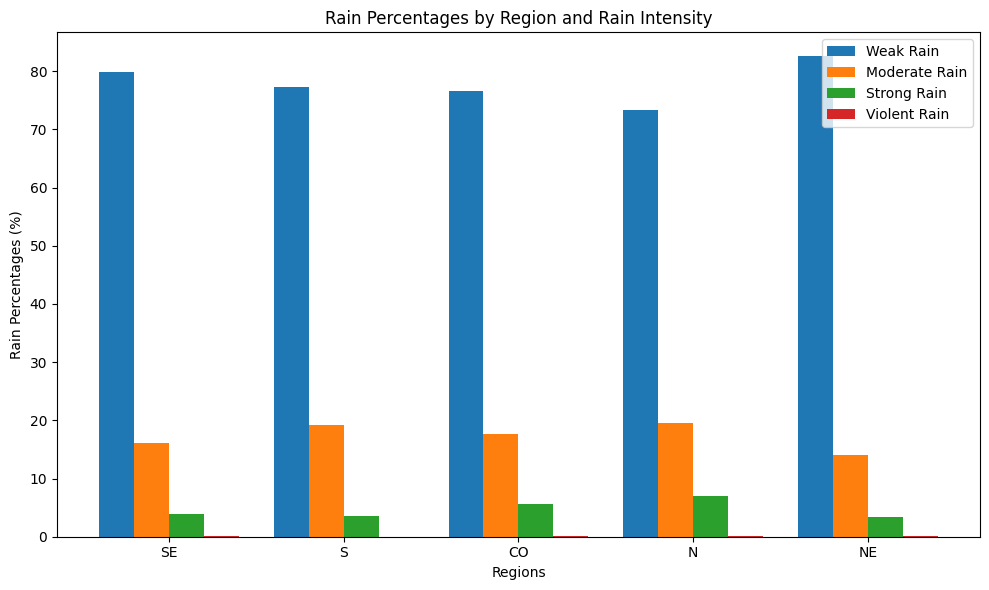

In [34]:
# Calculate the percentages
weak_percentages = [count / total * 100 for count, total in zip(weak_counts, total_counts)]
moderate_percentages = [count / total * 100 for count, total in zip(moderate_counts, total_counts)]
strong_percentages = [count / total * 100 for count, total in zip(strong_counts, total_counts)]
violent_percentages = [count / total * 100 for count, total in zip(violent_counts, total_counts)]

# Labels for each region
regions = ['SE', 'S', 'CO', 'N', 'NE']


# Plotting
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(range(len(regions)), weak_percentages, width, label='Weak Rain')
bar2 = ax.bar([p + width for p in range(len(regions))], moderate_percentages, width, label='Moderate Rain')
bar3 = ax.bar([p + 2 * width for p in range(len(regions))], strong_percentages, width, label='Strong Rain')
bar4 = ax.bar([p + 3 * width for p in range(len(regions))], violent_percentages, width, label='Violent Rain')

ax.set_xlabel('Regions')
ax.set_ylabel('Rain Percentages (%)')
ax.set_title('Rain Percentages by Region and Rain Intensity')
ax.set_xticks([p + 1.5 * width for p in range(len(regions))])
ax.set_xticklabels(regions)
ax.legend()

plt.tight_layout()
plt.show()

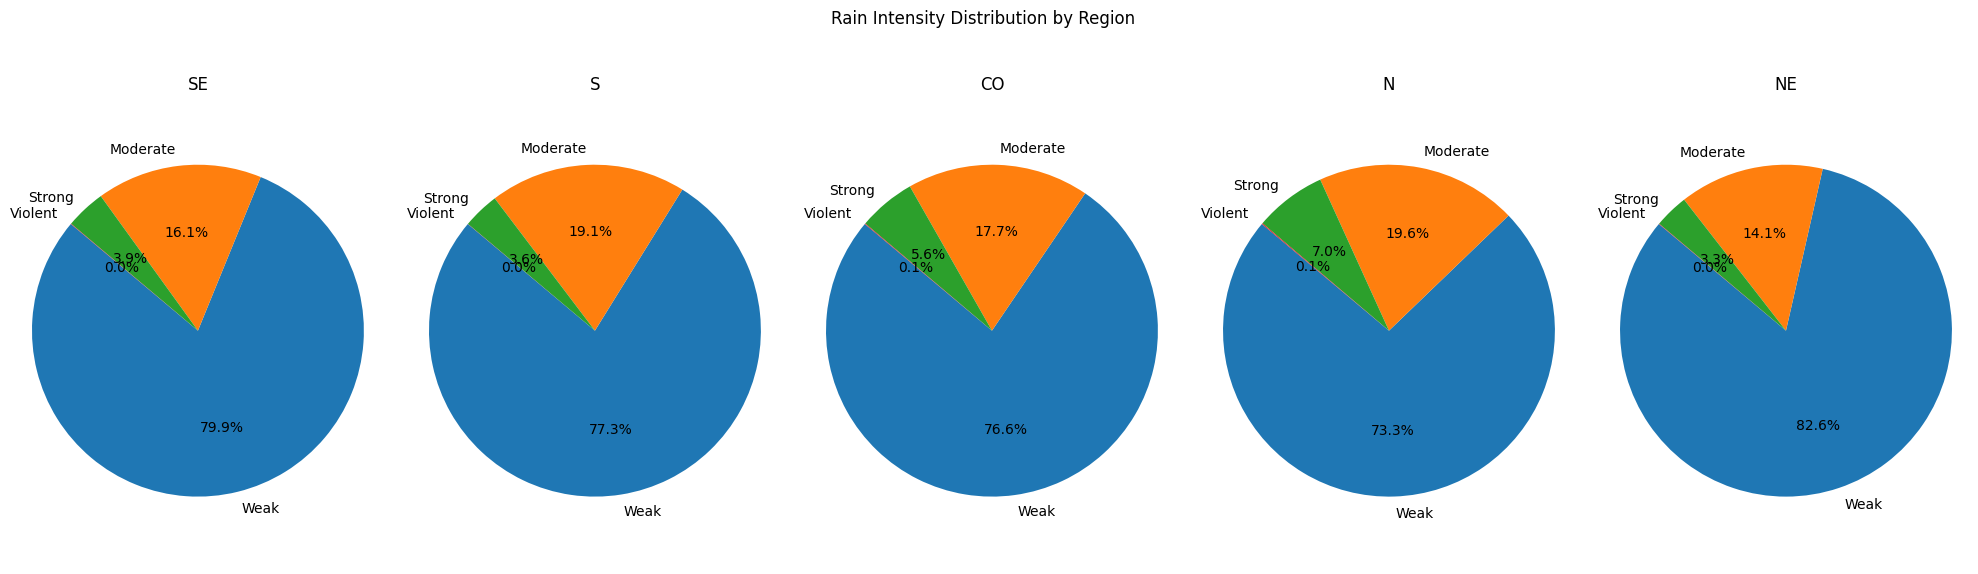

In [35]:
# Calculate the total count for each region
total_counts = [se_weak_rain_count + se_moderate_rain_count + se_strong_rain_count + se_violent_rain_count,
                s_weak_rain_count + s_moderate_rain_count + s_strong_rain_count + s_violent_rain_count,
                co_weak_rain_count + co_moderate_rain_count + co_strong_rain_count + co_violent_rain_count,
                n_weak_rain_count + n_moderate_rain_count + n_strong_rain_count + n_violent_rain_count,
                ne_weak_rain_count + ne_moderate_rain_count + ne_strong_rain_count + ne_violent_rain_count]

# Calculate the percentages
weak_percentages = [count / total * 100 for count, total in zip(weak_counts, total_counts)]
moderate_percentages = [count / total * 100 for count, total in zip(moderate_counts, total_counts)]
strong_percentages = [count / total * 100 for count, total in zip(strong_counts, total_counts)]
violent_percentages = [count / total * 100 for count, total in zip(violent_counts, total_counts)]

# Labels for each region
regions = ['SE', 'S', 'CO', 'N', 'NE']

# Plotting pie charts for each region
fig, axs = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle('Rain Intensity Distribution by Region')

for i in range(len(regions)):
    ax = axs[i]
    ax.pie([weak_percentages[i], moderate_percentages[i], strong_percentages[i], violent_percentages[i]],
           labels=['Weak', 'Moderate', 'Strong', 'Violent'],
           autopct='%1.1f%%', startangle=140)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(regions[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Analisando apenas as chuvas violentas

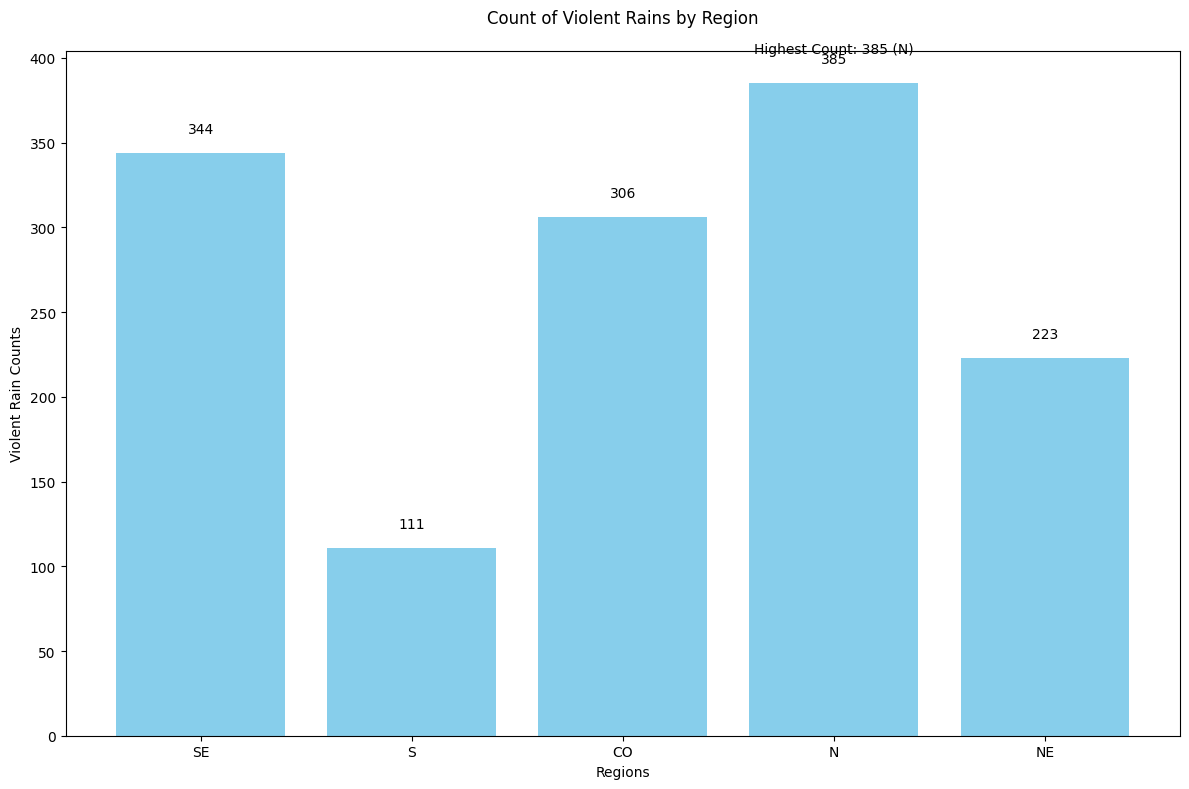

In [39]:
# Calculate the total count for each region
violent_counts = [se_violent_rain_count, s_violent_rain_count, co_violent_rain_count, n_violent_rain_count, ne_violent_rain_count]

# Labels for each region
regions = ['SE', 'S', 'CO', 'N', 'NE']

# Find the region with the maximum count of violent rains
max_violent_count = max(violent_counts)
max_violent_region = regions[violent_counts.index(max_violent_count)]

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

bar = ax.bar(range(len(regions)), violent_counts, color='skyblue')
ax.set_xlabel('Regions')
ax.set_ylabel('Violent Rain Counts')
ax.set_title('Count of Violent Rains by Region', pad=20)
ax.set_xticks(range(len(regions)))
ax.set_xticklabels(regions)

# Annotate the region with the highest count
annotation_y = max_violent_count + 20
ax.annotate(f'Highest Count: {max_violent_count} ({max_violent_region})',
            xy=(violent_counts.index(max_violent_count), max_violent_count),
            xytext=(0, 20),
            textcoords='offset points',
            ha='center', va='bottom')

# Adding data labels on top of the bars
for i, count in enumerate(violent_counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.1, 1, 0.9])  # Adjust the layout to provide space for the title and annotation
plt.show()

Previsões: [12. 14. 16.]


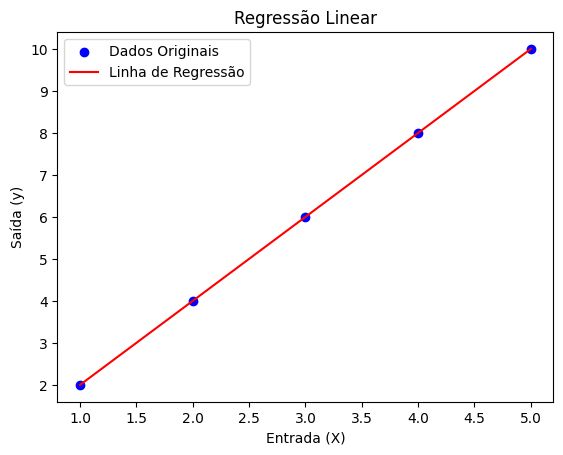

In [46]:
dfs_list = [[1], [2], [3], [4], [5]]  # Lista de listas para representar características
dfs_sum_list = [2, 4, 6, 8, 10]  # Lista de valores de saída correspondentes

# 2. Converter as Listas em Arrays Numpy
X = np.array(dfs_list)
y = np.array(dfs_sum_list)

# 3. Treinar o Modelo
model = LinearRegression()
model.fit(X, y)

# Fazer previsões com base em novos dados
X_new = [[6], [7], [8]]
y_pred = model.predict(X_new)

print(f'Previsões: {y_pred}')

# 4. Visualização (Opcional)
# Plotar os dados originais e a linha de regressão
plt.scatter(X, y, color='blue', label='Dados Originais')
plt.plot(X, model.predict(X), color='red', label='Linha de Regressão')
plt.xlabel('Entrada (X)')
plt.ylabel('Saída (y)')
plt.title('Regressão Linear')
plt.legend()
plt.show()


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dfs_list, dfs_sum_list
, test_size=0.2, random_state=42)

# Criando o modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo com os dados de treinamento
random_forest.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
predictions = random_forest.predict(X_test)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, predictions)
print("A precisão do modelo é:", accuracy)


A precisão do modelo é: 0.0
